In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm      
import scipy.stats 
# from sampleSplit import *
from sampleSplit_copy import *
import seaborn as sns
import plotly.express as px

# LOAD AND TRANSFORM DATA

In [2]:
states = pd.read_excel(r"C:\Users\leoac\OneDrive - Università degli Studi di Milano\Unimi\Subjects\Statistics\Extra project\Project 5 - States data\State data.xlsx")

In [3]:
states.columns = ['Acronym', 'Population', 'Income', 'Illiteracy', 'Life.Exp',
       'Murder', 'HS.Grad', 'Frost', 'Area']
states["Density"] = states.Population/states.Area

In [4]:
states = states.sort_values("Population",ascending=False)
states.head()

,Acronym,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Density
19,CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,0.135571
14,NY,18076,4903,1.4,70.55,10.9,52.7,82,47831,0.377914
4,TX,12237,4188,2.2,70.90,12.2,47.4,35,262134,0.046682
24,PA,11860,4449,1.0,70.43,6.1,50.2,126,44966,0.263755
26,IL,11197,5107,0.9,70.14,10.3,52.6,127,55748,0.200850


In [5]:
for col in states.columns[1:]:
    print(col, states[col].mean())

Population 4246.42
Income 4435.8
Illiteracy 1.17
Life.Exp 70.87859999999999
Murder 7.378000000000001
HS.Grad 53.10799999999999
Frost 104.46
Area 70735.88
Density 0.14922447334253808


# DATAVIZ

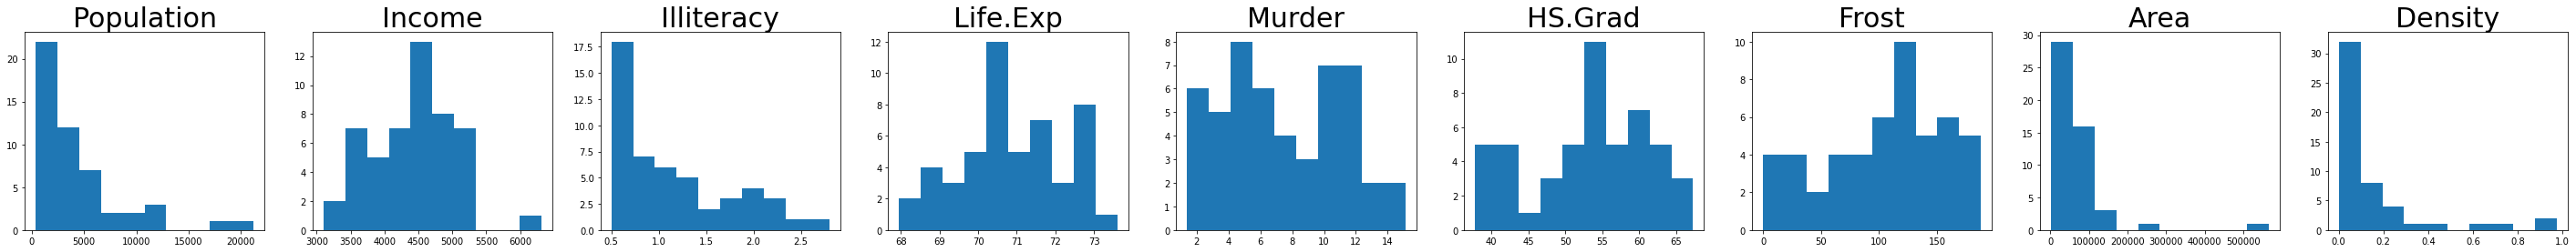

In [6]:
fig, ax = plt.subplots(figsize=(50,4),ncols=9)
for i, col in zip(range(len(states.columns[1:])),states.columns[1:]):
    ax[i].hist(states[col])
    ax[i].set_title(col,fontdict={'fontsize': 30})

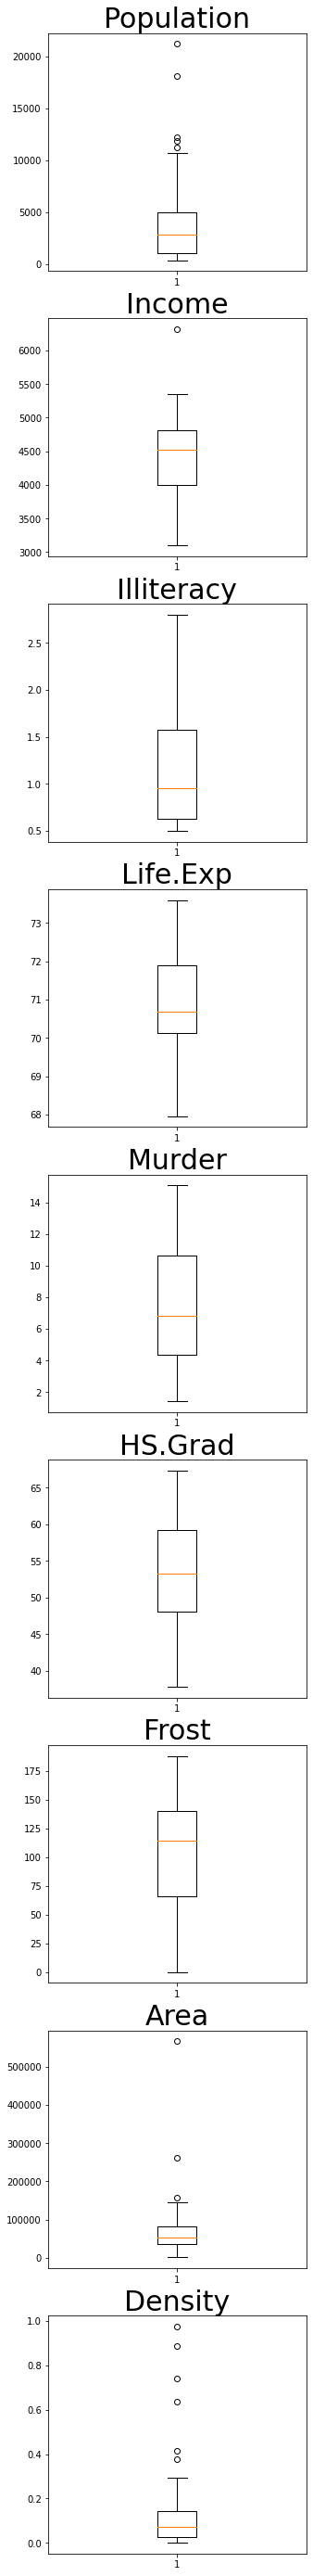

In [7]:
fig, ax = plt.subplots(figsize=(5,50),nrows=9)
for i, col in zip(range(len(states.columns[1:])),states.columns[1:]):
    ax[i].boxplot(states[col])
    ax[i].set_title(col,fontdict={'fontsize': 30})               

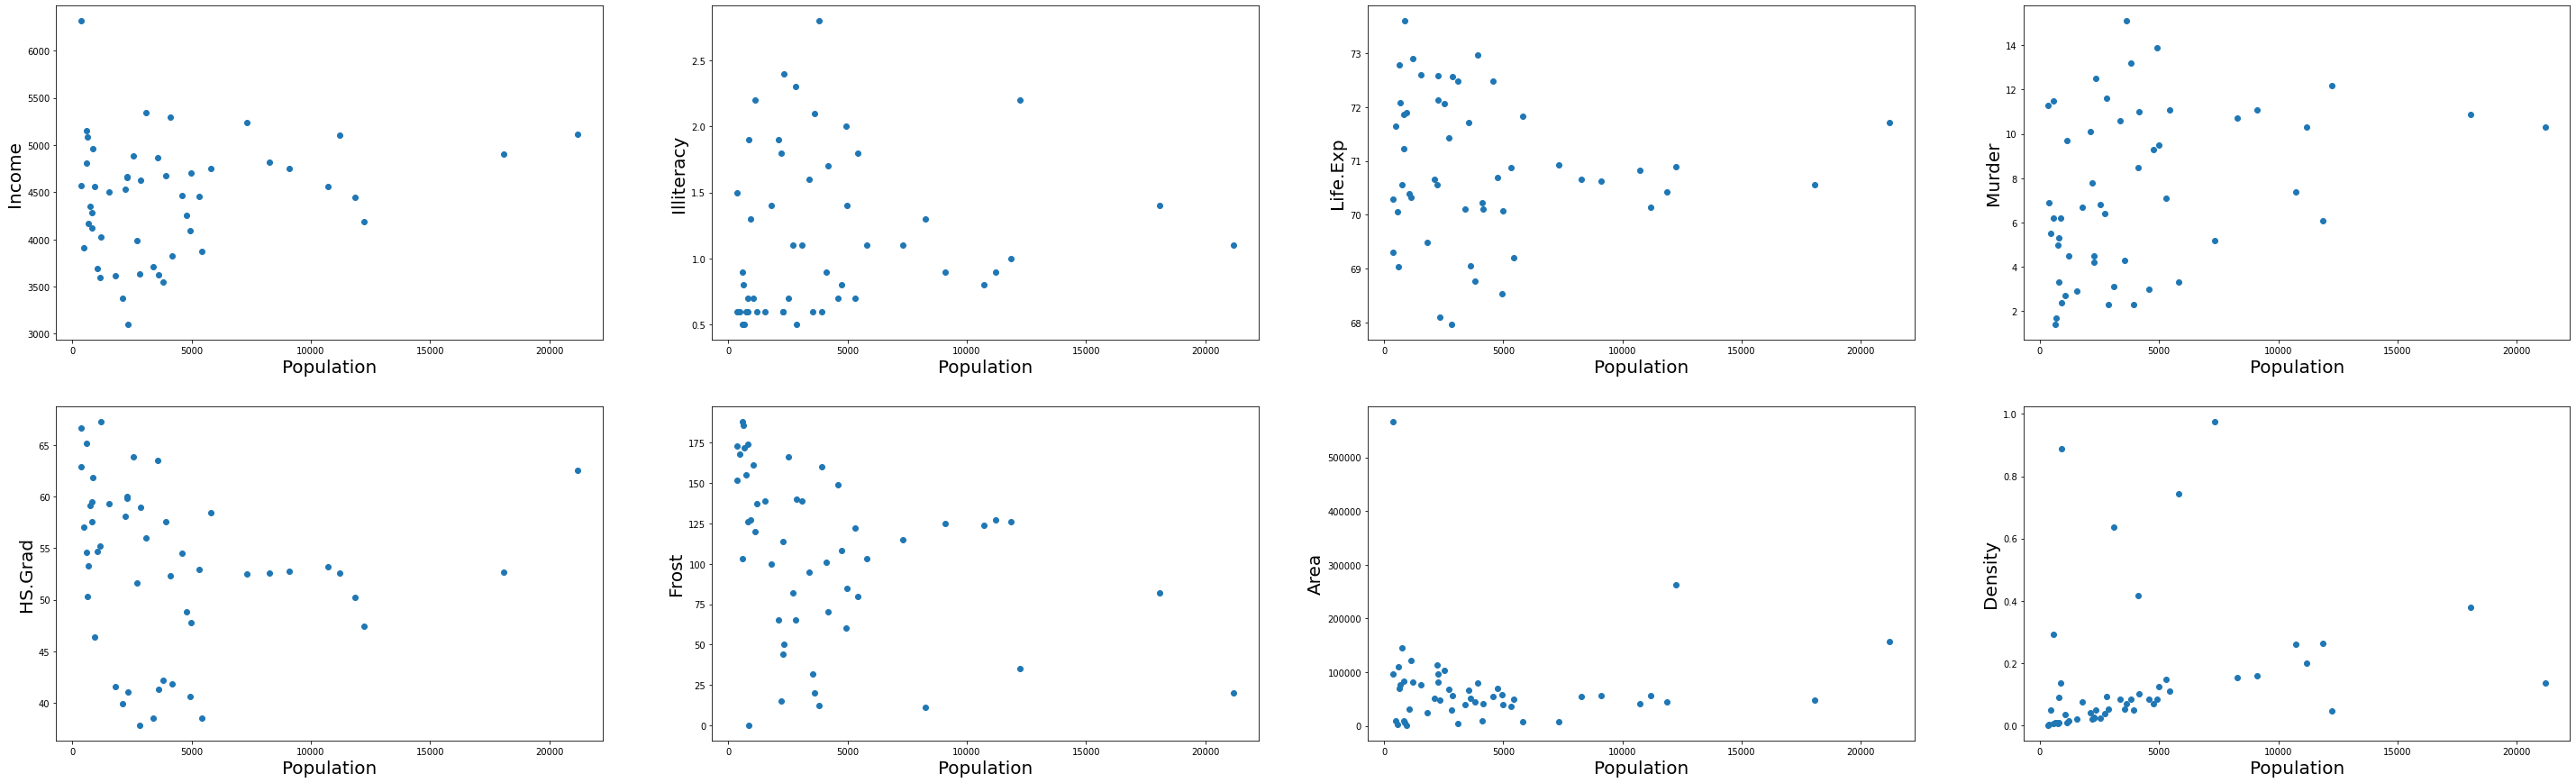

In [8]:
fig, ax = plt.subplots(figsize=(50,15),nrows=2,ncols=4)

n = 0
for j in range(len(ax)):
    for i, col in zip([0,1,2,3],states.columns[2+n:6+n]):
      ax[j][i].scatter(states.Population,states[col])
      ax[j][i].set_xlabel("Population",fontdict={'fontsize':20})
      ax[j][i].set_ylabel(col,fontdict={'fontsize':20})
    n += 4

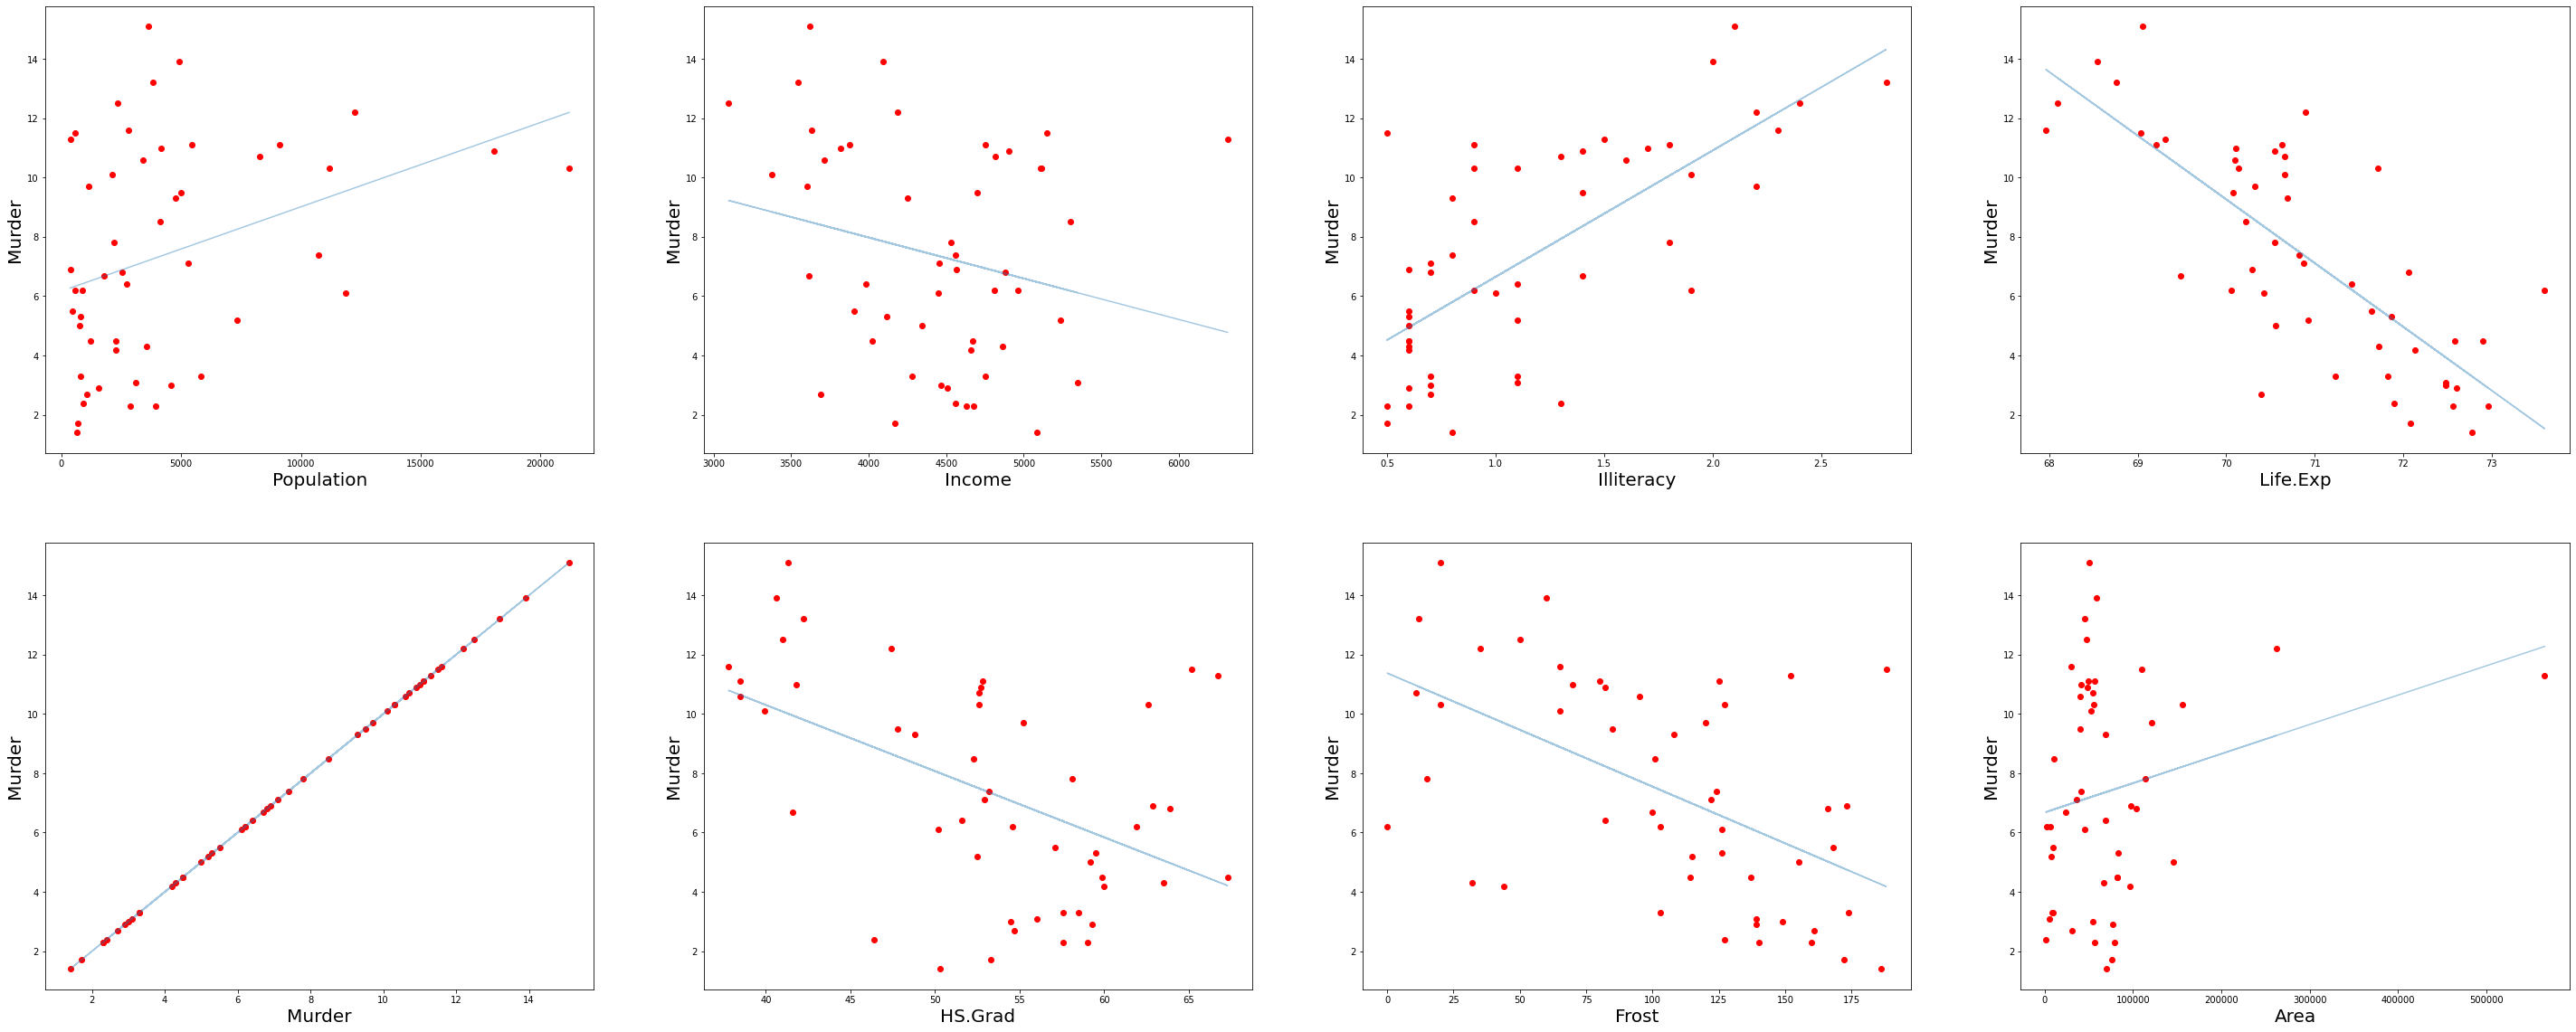

In [9]:
fig, ax = plt.subplots(figsize=(50,20),nrows=2,ncols=4)

n = 0
for j in range(len(ax)):
    for i, col in zip([0,1,2,3],states.columns[1+n:6+n]):
      m, b = np.polyfit(states[col], states.Murder, 1)
      ax[j][i].scatter(states[col],states.Murder, c="Red",)
      ax[j][i].plot(states[col], m*states[col]+b, alpha=0.4,)
      ax[j][i].set_xlabel(col,fontdict={'fontsize':20})
      ax[j][i].set_ylabel("Murder",fontdict={'fontsize':20})
    n += 4

In [10]:
fig = px.choropleth(states,
                    locations='Acronym', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Murder',
                    color_continuous_scale="reds"
                    )
fig.show()

# CORRELATION

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Density
Population,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544,0.246228
Income,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315,0.329968
Illiteracy,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261,0.009274
Life.Exp,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332,0.091062
Murder,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390,-0.185035
HS.Grad,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542,-0.088367
Frost,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229,0.002277
Area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000,-0.341389
Density,0.246228,0.329968,0.009274,0.091062,-0.185035,-0.088367,0.002277,-0.341389,1.000000


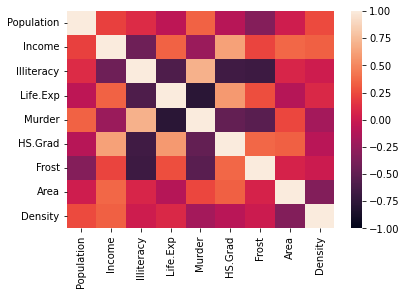

In [11]:
sns.heatmap(states[states.columns[1:]].corr(), vmin=-1, vmax=1)
states[states.columns[1:]].corr()

# ANALYSIS OF THE THREE VARIABLES OF INTEREST


But first check for Murder outliers

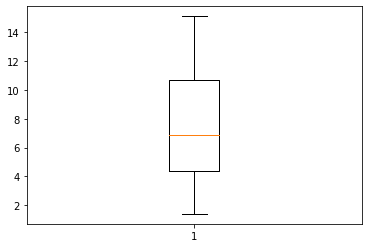

In [12]:
plt.boxplot(states.Murder); # no outliers

F-test

In [18]:
def f_test(a,b):
    F = np.var(a,ddof=1)/np.var(b,ddof=1)
    df1 = np.array(a).size - 1
    df2 = np.array(b).size - 1
    if np.var(a,ddof=1) >= np.var(b,ddof=1):
        p_value = 1 - scipy.stats.f.cdf(F,df1,df2)
    else: 
        p_value = scipy.stats.f.cdf(F,df1,df2)
    if p_value >= 0.05:
        return F, p_value, "f_p_value >= 0.05 Variances are not different"
    else:   
        return F, p_value, "f_p_value < 0.05 Variances are different"

t-test


Income, median, var_low: 15.27, var_high: 10.61, f_p_value >= 0.05 Variances are not different
Ttest_indResult(statistic=1.236352558654397, pvalue=0.22234331288315293)
p_value of the t-test is: 0.22234331288315293 >= 0.05 hence is ACCEPTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high Income samples divided by the median

Income, iq_range_mean_point, var_low: 15.13, var_high: 10.08, f_p_value >= 0.05 Variances are not different
Ttest_indResult(statistic=2.126492972537456, pvalue=0.038630848172984136)
p_value of the t-test is: 0.038630848172984136 < 0.05 hence is REJECTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high Income samples divided by the iq_range_mean_point

Income, m, var_low: 15.13, var_high: 10.08, f_p_value >= 0.05 Variances are not different
Ttest_indResult(statistic=2.126492972537456, pvalue=0.038630848172984136)
p_value of the t-test is: 0.038630848172984136 < 0

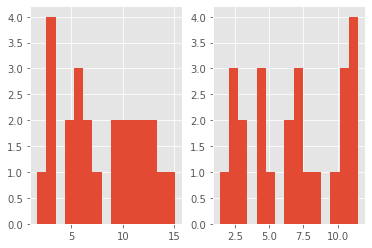

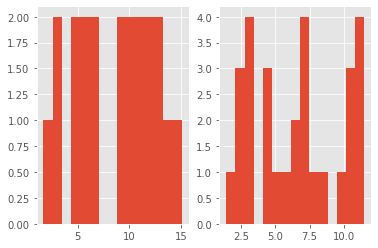

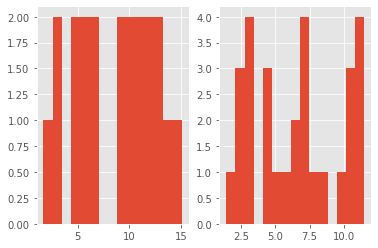

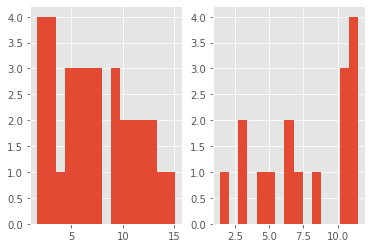

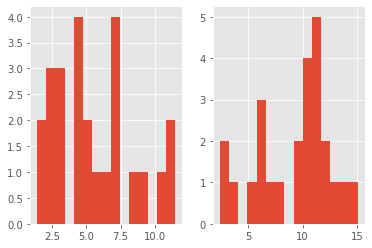

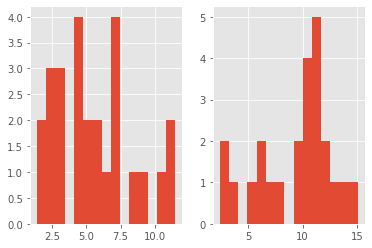

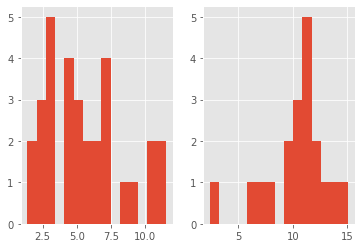

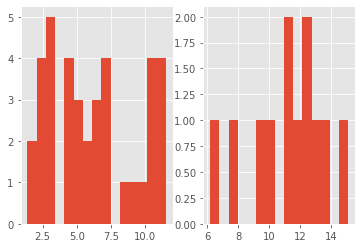

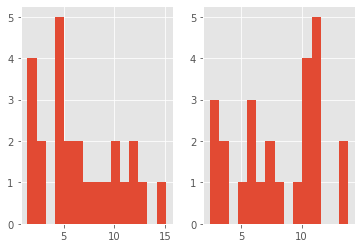

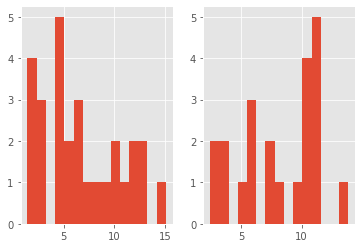

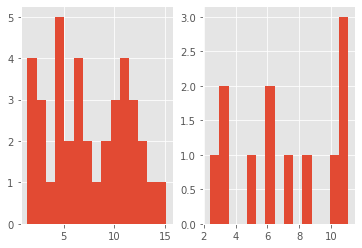

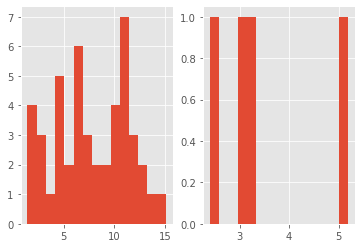

In [19]:
splitters = ['median','iq_range_mean_point','m','minmax_mean_point']
for col in ['Income', 'Illiteracy','Density']:
    ss = sampleSplit(df = states, col = col, target="Murder")
    big_df = ss.split()
    for splitter in splitters:
        a = big_df.loc[splitter][0]
        b = big_df.loc[splitter][1]
        f_p_value = f_test(a,b)[1]
        f_str_outcome = f_test(a,b)[2]
        fig, ax = plt.subplots(1, ncols=2)
        a.hist(ax=ax[0],bins=15)
        b.hist(ax=ax[1],bins=15)
        if f_p_value >= 0.05: # F-TEST --> H0: variances are equal
            print('\n'+f"{col}, {splitter}, var_low: {round(np.var(a),2)}, var_high: {round(np.var(b),2)}, {f_str_outcome}")
            print(scipy.stats.ttest_ind(a,b,equal_var=True))
            t_p_value = scipy.stats.ttest_ind(a,b,equal_var=True)[1]
            if t_p_value >= 0.05: # t-TEST --> H0: means are equal
                print(f"p_value of the t-test is: {t_p_value} >= 0.05 hence is ACCEPTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high {col} samples divided by the {splitter}")
            else: # t-TEST --> H1: means are not equal
                print(f"p_value of the t-test is: {t_p_value} < 0.05 hence is REJECTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high {col} samples divided by the {splitter}")                
        else: # F-TEST --> H1: variances are not equal
            print('\n'+f"{col}, {splitter}, var_low: {round(np.var(a),2)}, var_high: {round(np.var(b),2)}, {f_str_outcome}")
            print(scipy.stats.ttest_ind(a,b,equal_var=False))
            t_p_value = scipy.stats.ttest_ind(a,b,equal_var=False)[1]
            if t_p_value >= 0.05: # t-TEST --> H0: means are equal
                print(f"p_value of the t-test is: {t_p_value} >= 0.05 hence is ACCEPTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high {col} samples divided by the {splitter}")
            else: # t-TEST --> H1: means are not equal
                print(f"p_value of the t-test is: {t_p_value} < 0.05 hence is REJECTED the null hypotesis of no statistical difference in the mean murder rate between the low and the high {col} samples divided by the {splitter}")

# If p-value slightly less then 0.05 the level of significance alpha can impact the result
            

# PRESENTATION ELEMENTS

t-test plot

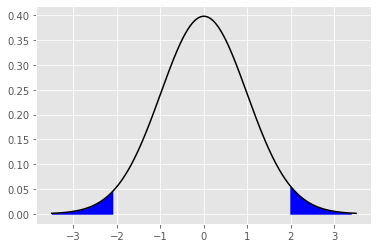

In [15]:
from scipy import stats as stats
plt.style.use('ggplot')
x = np.linspace(-3.5,3.5, 1000)
t = stats.t(100)

plt.plot(x, t.pdf(x), 'black')

a = 0.05
t_alpha_half = stats.t.ppf([(1-a/2)],df=100)
t_alpha_half
pxR = np.arange(start=t_alpha_half,stop=3.5,step=0.2)
pxL = np.arange(start=-3.5,stop=-t_alpha_half,step=0.2)

plt.fill_between(pxR, t.pdf(pxR),color='b')
plt.fill_between(pxL, t.pdf(pxL),color='b')
plt.show()


F-test plot

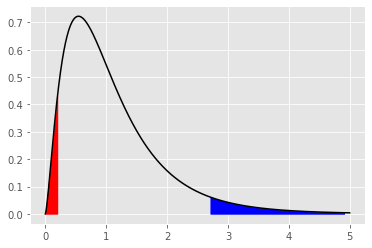

In [16]:
from scipy import stats as stats
plt.style.use('ggplot')
x = np.linspace(0,5, 1000)
F = stats.f(5,20)

plt.plot(x, F.pdf(x), 'black')

a = 0.05
F_alpha_R = F.ppf([(1-a)])
F_alpha_L = F.ppf([(a)])
pxR = np.arange(start=F_alpha_R,stop=5,step=0.2)
pxL = np.arange(start=0,stop=F_alpha_L,step=0.2)

plt.fill_between(pxR, F.pdf(pxR),color='b')
plt.fill_between(pxL, F.pdf(pxL),color='r')
plt.show()